<a href="https://colab.research.google.com/github/vanstevanzaky/PEMB_MESIN_LEARING_TI_25-26/blob/main/Week11_klasifikasi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1 Klasifikasi SVM dengan Data Dummy Linier

## Langkah 1 - Import Library

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

**Penjelasan:** Import library dasar untuk komputasi numerik (numpy), visualisasi (matplotlib, seaborn), dan analisis statistik (scipy).

**Analisis Output:** Semua library yang dibutuhkan untuk praktikum SVM telah berhasil diimport tanpa error.

## Langkah 2 - Membuat Data Dummy

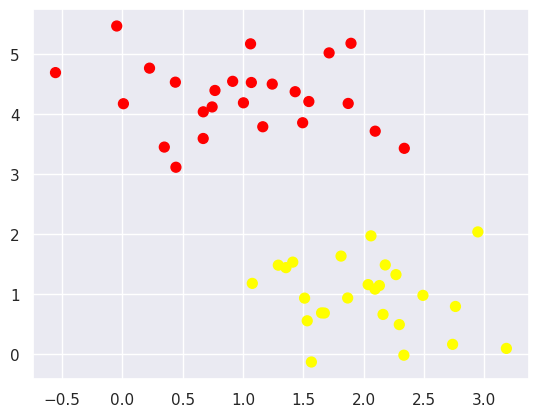

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

**Penjelasan:** Dataset dibuat menggunakan `make_blobs` dengan parameter:
- **n_samples=50**: Jumlah total sampel
- **centers=2**: Jumlah cluster/kelas
- **random_state=0**: Seed untuk reproduksibilitas
- **cluster_std=0.60**: Standar deviasi cluster

**Analisis Output:** Scatter plot menunjukkan dua kelas yang dapat dipisahkan secara linear (linearly separable). Warna berbeda menandakan kelas yang berbeda.

Pada praktikum ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

## Langkah 3 - Buat Ilustrasi Garis Pemisah

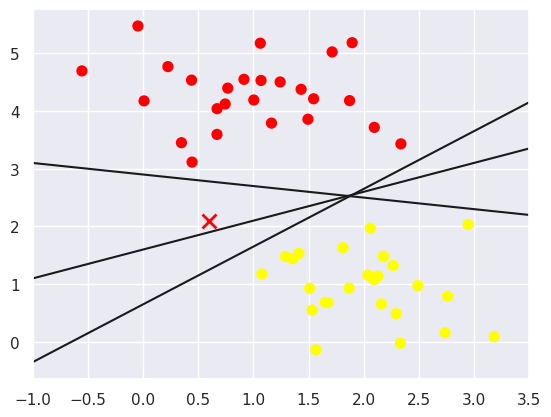

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

**Penjelasan:** Visualisasi beberapa kemungkinan garis pemisah (decision boundary) untuk data dengan 2 kelas. Tanda 'x' merah menunjukkan data baru yang akan diklasifikasikan.

**Analisis Output:** Terdapat banyak garis yang dapat memisahkan kedua kelas, menunjukkan ambiguitas dalam pemilihan model terbaik.

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

## Langkah 4 - Konsep Margin dalam SVM

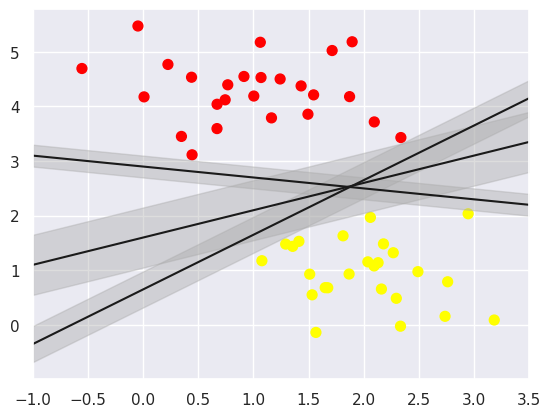

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

**Penjelasan:** Visualisasi margin (area abu-abu) di sekitar decision boundary. Margin adalah jarak antara garis pemisah dengan data terdekat dari masing-masing kelas.

**Analisis Output:** SVM akan memilih garis dengan margin maksimal untuk menghasilkan model yang paling robust.

Dengan banyaknya garis pemisah, SVM membuat sebuah skema untuk mengambil garis pemisah terbaik, yakni dengan **memaksimalkan margin** di antara himpunan data.

## Langkah 5 - Fitting Model SVM

### Langkah 5.1 - Training SVM

In [7]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

**Penjelasan:** Membuat model SVM dengan kernel linear dan parameter C yang sangat besar (1E10) untuk hard margin classification.

**Analisis Output:** Model SVM berhasil di-train pada dataset dummy.

### Langkah 5.2 - Buat Fungsi untuk Visualisasi Decision Boundary

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Penjelasan:** Fungsi untuk memvisualisasikan decision boundary dan margin dari model SVM. Garis solid = decision boundary, garis putus-putus = margin.

**Analisis Output:** Fungsi ini akan digunakan untuk visualisasi hasil training SVM.

### Langkah 5.3 - Plot Decision Boundary dan Support Vectors

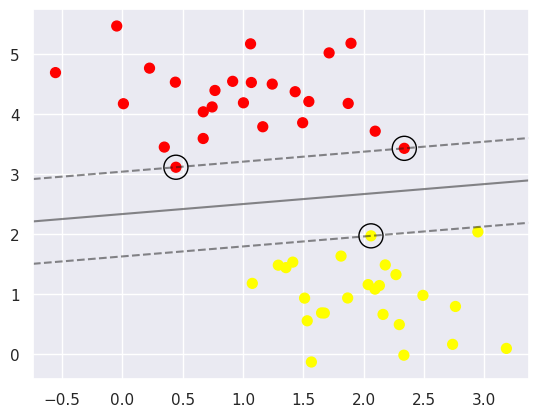

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

**Penjelasan:** Visualisasi decision boundary, margin, dan support vectors dari model SVM yang telah di-train.

**Analisis Output:** Garis solid hitam = decision boundary, garis putus-putus = margin, titik yang dilingkari = support vectors.

Titik-titik yang dilingkari merupakan **support vectors**, yakni data yang menentukan lokasi garis pemisah (decision boundary).

### Langkah 5.4 - Identifikasi Support Vectors

In [10]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

**Penjelasan:** Menampilkan koordinat support vectors yang menentukan decision boundary model SVM.

**Analisis Output:** Hanya sebagian kecil data (support vectors) yang menentukan model, bukan keseluruhan dataset.

### Langkah 5.5 - Pengaruh Support Vectors terhadap Model

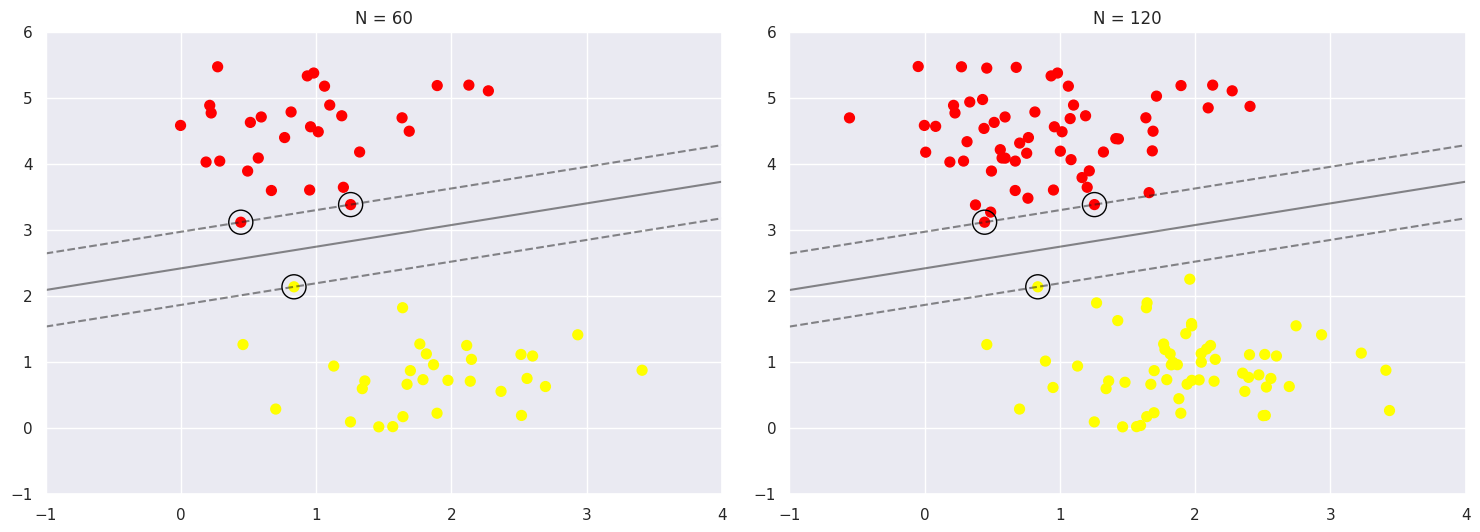

In [11]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

**Penjelasan:** Perbandingan model SVM dengan jumlah data berbeda (N=60 vs N=120) untuk menunjukkan bahwa decision boundary tidak berubah.

**Analisis Output:** Meskipun jumlah data berbeda, decision boundary dan margin tetap sama karena hanya bergantung pada support vectors.

Pada grafik di atas, garis dan margin tidak berubah walaupun jumlah sampel berubah. Hal ini menunjukkan bahwa model SVM hanya bergantung pada support vectors, bukan pada keseluruhan data.

### Langkah 5.6 - Kesimpulan

**Kesimpulan:**
- SVM mencari hyperplane dengan margin maksimal
- Support vectors adalah titik-titik yang menentukan decision boundary
- Model tidak terpengaruh oleh data yang jauh dari decision boundary
- SVM efisien karena hanya bergantung pada support vectors

---

# Praktikum 2: SVM dengan Data Non-Linier

## Langkah 1 - Ilustrasi Data Non-Linier

### Langkah 1a - Import Library

In [12]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

**Penjelasan:** Membuat dataset circular (lingkaran konsentris) yang tidak dapat dipisahkan secara linear.

**Analisis Output:** Dataset ini membutuhkan kernel non-linear untuk klasifikasi yang baik.

### Langkah 1b - Buat Fungsi untuk Plotting

In [13]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Langkah 1c - Plot Data Dummy

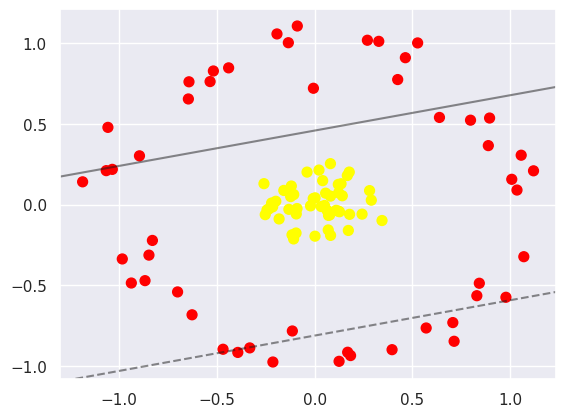

In [14]:
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

**Penjelasan:** Mencoba menggunakan SVM linear pada data circular untuk menunjukkan keterbatasannya.

**Analisis Output:** Linear SVM gagal memisahkan data circular karena decision boundary berbentuk garis lurus tidak cocok untuk pola melingkar.

Linear SVM tidak dapat memisahkan data circular ini dengan baik.

### Langkah 1d - Proyeksi Data ke Dimensi Lebih Tinggi

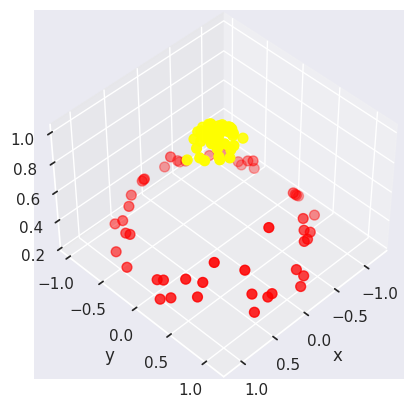

In [15]:
from mpl_toolkits import mplot3d

r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D(elev=45, azim=45)

**Penjelasan:** Proyeksi data 2D ke 3D menggunakan fungsi radial $r = e^{-(X^2).sum(1)}$. Di dimensi 3D, data circular menjadi linearly separable.

**Analisis Output:** Dengan menambahkan dimensi ketiga (r), dua kelas yang sebelumnya melingkar di 2D sekarang dapat dipisahkan dengan hyperplane di 3D.

Dengan proyeksi radial $r = e^{-(X^2).sum(1)}$, data menjadi linearly separable di dimensi 3D.

## Langkah 2 - Fitting Model dengan Kernel RBF

In [16]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

**Penjelasan:** Training SVM dengan kernel RBF (Radial Basis Function) yang secara implisit melakukan proyeksi ke dimensi lebih tinggi.

**Analisis Output:** Model SVM dengan RBF kernel berhasil di-train. Parameter C=1E6 (sangat besar) untuk hard margin.

### Langkah 2a - Plot Hasil dengan RBF Kernel

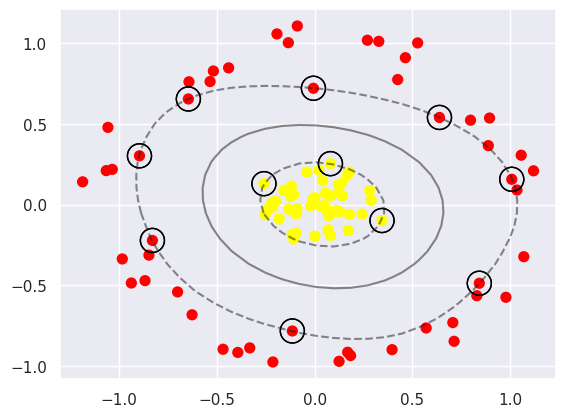

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none', edgecolors='black');

**Penjelasan:** Visualisasi hasil SVM dengan RBF kernel. Decision boundary berbentuk melingkar, mengikuti pola data.

**Analisis Output:** RBF kernel berhasil membuat decision boundary non-linear yang sempurna memisahkan dua kelas circular. Support vectors ditandai dengan lingkaran hitam.

Dengan **RBF (Radial Basis Function) kernel**, SVM dapat memisahkan data circular dengan sempurna. Kernel RBF melakukan proyeksi implisit ke dimensi lebih tinggi.

---

# Praktikum 3: Tuning Hyperparameter SVM

## Langkah 1 - Import Library dan Fungsi

In [18]:
# Reuse fungsi plot_svc_decision_function dari sebelumnya
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

**Penjelasan:** Import library dan reuse fungsi plotting dari praktikum sebelumnya.

**Analisis Output:** Library siap digunakan untuk eksperimen hyperparameter tuning.

## Langkah 2 - Buat Data Dummy dengan Overlap

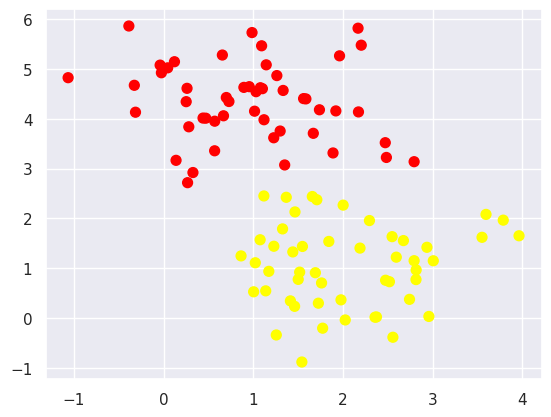

In [19]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

**Penjelasan:** Dataset dibuat dengan `cluster_std=0.8` (lebih besar) untuk membuat overlap antar kelas. Ini mensimulasikan data real-world yang tidak perfectly separable.

**Analisis Output:** Scatter plot menunjukkan dua kelas yang overlap (tidak bisa dipisahkan sempurna dengan garis lurus). Kondisi ini memerlukan soft margin SVM.

## Langkah 3 - Analisis Dampak Tuning Parameter C

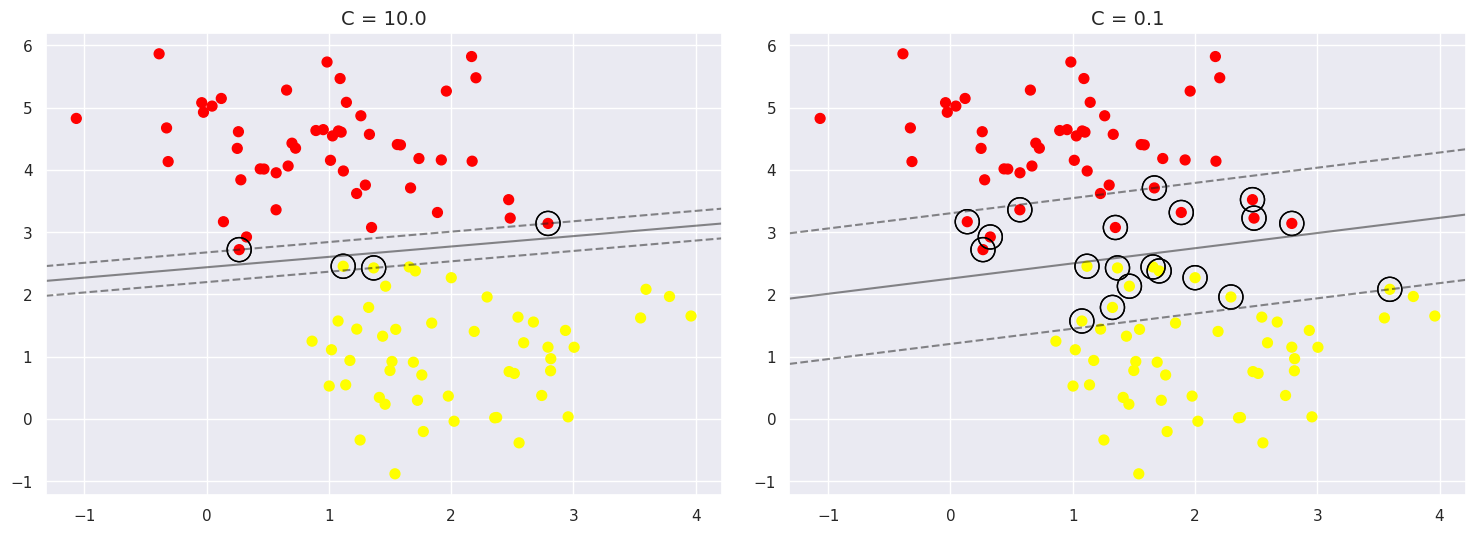

In [20]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none', edgecolors='black');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

**Penjelasan:** Membandingkan dua nilai C berbeda:
- **C=10.0 (besar)**: Hard margin - margin sempit, minimize error
- **C=0.1 (kecil)**: Soft margin - margin lebar, toleransi error lebih besar

**Analisis Output:**
- C besar → margin sempit, sedikit support vectors, overfitting risk
- C kecil → margin lebar, banyak support vectors, lebih generalized

Untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah **parameter tuning C**. Contoh di atas menunjukkan perubahan pada C berdampak pada hasil fitting final.

- **C besar (10.0)**: Margin sempit, sedikit support vectors (hard margin)
- **C kecil (0.1)**: Margin lebar, banyak support vectors (soft margin)

---

# Praktikum 4: Face Recognition dengan SVM

## Langkah 0 - Unduh Dataset Labeled Faces in the Wild

In [21]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


**Penjelasan:** Download dataset Labeled Faces in the Wild (LFW), filter hanya yang memiliki minimal 60 foto per orang.

**Analisis Output:** Dataset berisi foto wajah dari beberapa public figure. Output menunjukkan nama-nama orang dan dimensi citra (jumlah, tinggi, lebar).

## Langkah 1 - Inspeksi Citra Wajah

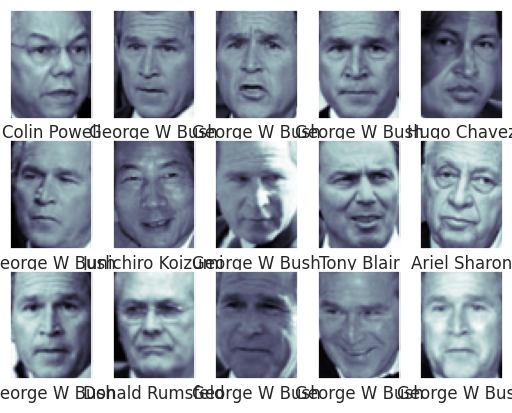

In [22]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## Langkah 2 - Pra Pengolahan Data dengan PCA

In [23]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

**Penjelasan:** Membuat pipeline dengan:
- **PCA**: Reduksi dimensi dari ~3000 fitur ke 150 komponen
- **SVC dengan RBF kernel**: Klasifikasi non-linear
- **class_weight='balanced'**: Handle class imbalance

**Analisis Output:** Pipeline siap untuk training, dengan preprocessing PCA terlebih dahulu sebelum SVM.

## Langkah 3 - Split Data

In [24]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                  random_state=42)

## Langkah 4 - Pembuatan Model + Hyperparameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.001}


**Penjelasan:** Grid search untuk mencari kombinasi hyperparameter terbaik (C dan gamma). Akan mencoba 4×4=16 kombinasi parameter.

**Analisis Output:** Best params menunjukkan kombinasi optimal dari C dan gamma yang memberikan validasi score tertinggi.

## Langkah 5 - Cek Hasil Prediksi

In [26]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

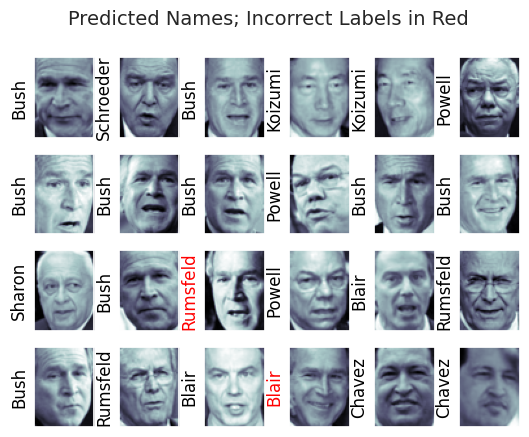

In [27]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

## Langkah 6 - Cek Performansi dengan Classification Report

In [28]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



**Penjelasan:** Classification report menampilkan precision, recall, f1-score untuk setiap kelas (orang).

**Analisis Output:** Report memberikan evaluasi komprehensif per-class, showing accuracy untuk setiap individu dalam dataset.

### Langkah 6b - Confusion Matrix

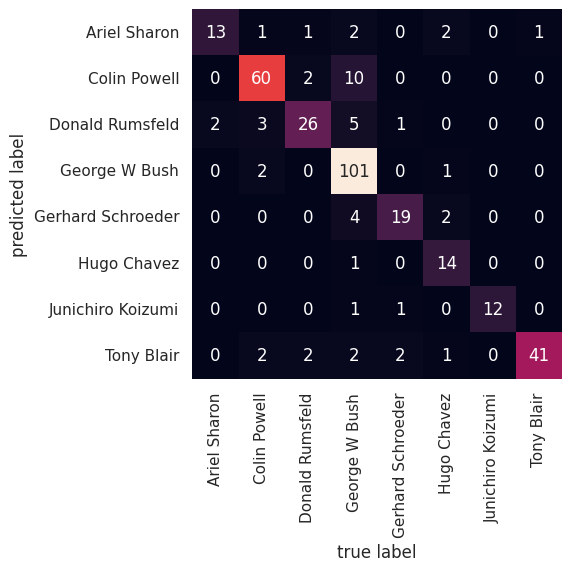

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

---

# Praktikum 5: Klasifikasi Citra Siang dan Malam

## Langkah 0 - Import Library

In [30]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

# Image directories
train_dir = "/content/drive/MyDrive/Praktikum Machine Learning/images/training"
test_dir = "/content/drive/MyDrive/Praktikum Machine Learning/images/test"

## Langkah 1 - Load Dataset

In [31]:
def load_dataset(image_dir):
    im_list = []
    image_types = ["day", "night"]

    for im_type in image_types:
        dir_path = Path(image_dir) / im_type

        for img_path in dir_path.glob("*.jpg"):
            im = mpimg.imread(img_path)

            if im is not None:
                im_list.append((im, im_type))

    return im_list

**Penjelasan:** Fungsi untuk load dataset citra dari folder `day` dan `night`. Setiap citra disimpan sebagai tuple (image, label).

**Analisis Output:** Fungsi mengembalikan list berisi semua citra beserta labelnya.

In [32]:
IMAGE_LIST = load_dataset(train_dir)

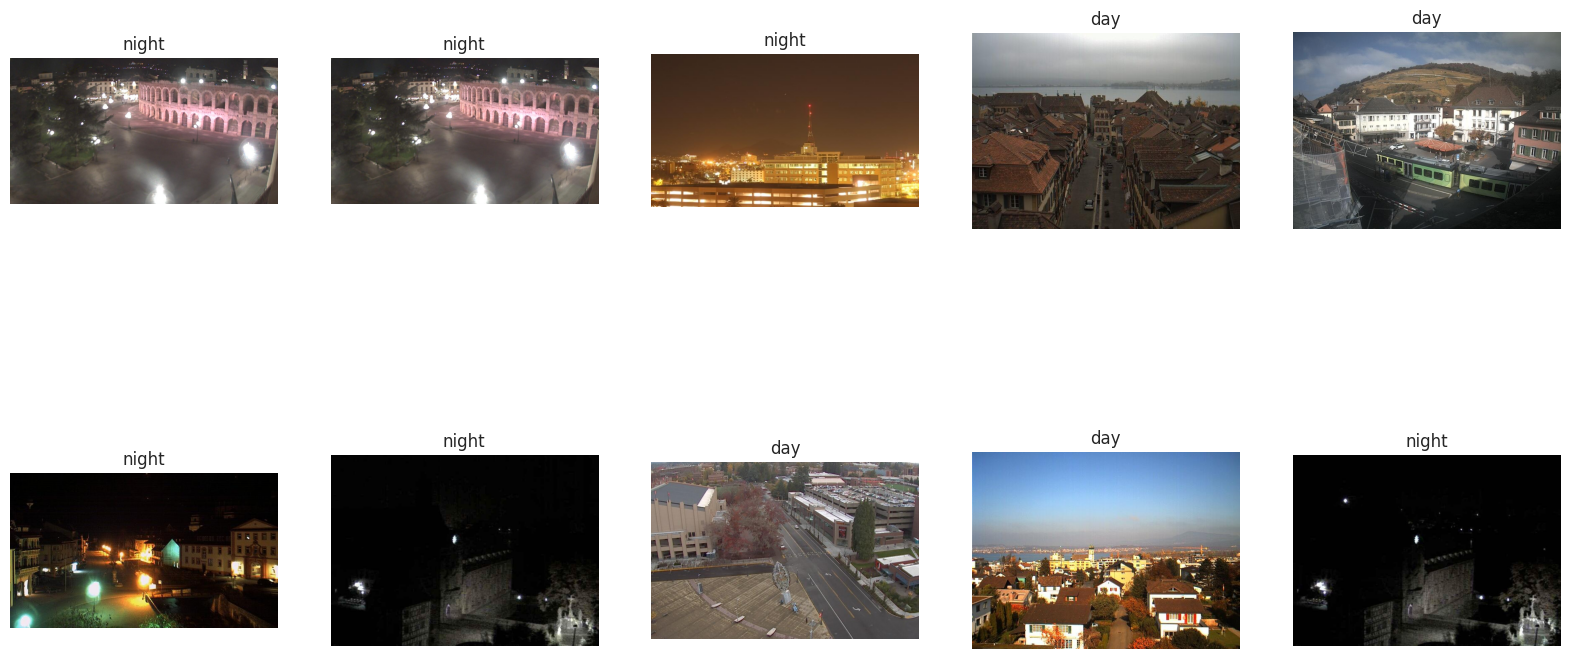

In [33]:
# Visualisasi random images
num_images = 10

fig = plt.figure(figsize=(20, 10))

for i in range(num_images):
    idx = random.randint(0, len(IMAGE_LIST) - 1)
    image, label = IMAGE_LIST[idx]

    ax = fig.add_subplot(2, 5, i + 1)
    ax.imshow(image)
    ax.set_title(label)
    ax.axis('off')

plt.show()

## Langkah 3 - Pra Pengolahan Data

In [34]:
def standardize(image_list):
    standard_im = []

    for item in image_list:
        image = item[0]
        label = item[1]

        standardized_im = cv2.resize(image, (1100, 600))

        if label == 'day':
            encoded_label = 1
        else:
            encoded_label = 0

        standard_im.append((standardized_im, encoded_label))

    return standard_im

**Penjelasan:** Fungsi untuk:
- Resize semua citra ke ukuran standar (1100×600)
- Encode label: day=1, night=0

**Analisis Output:** Semua citra memiliki dimensi sama dan label terenkode dalam bentuk numerik.

In [35]:
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## Langkah 4 - Ekstraksi Fitur

In [36]:
def avg_brightness(rgb_image):
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    sum_brightness = np.sum(hsv[:, :, 2])
    area = hsv.shape[0] * hsv.shape[1]
    avg = sum_brightness / area
    return avg

**Penjelasan:** Ekstraksi fitur brightness dengan:
- Convert RGB ke HSV (Hue, Saturation, Value)
- Ambil channel V (brightness)
- Hitung rata-rata brightness seluruh pixel

**Analisis Output:** Fitur brightness akan lebih tinggi untuk citra siang, lebih rendah untuk malam.

## Langkah 5 - Klasifikasi dengan Threshold

In [37]:
def estimate_label(rgb_image, threshold):
    avg = avg_brightness(rgb_image)
    if avg > threshold:
        predicted_label = 1
    else:
        predicted_label = 0
    return predicted_label

In [38]:
TEST_IMAGE_LIST = load_dataset(test_dir)
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

## Langkah 6 - Evaluasi

In [39]:
def evaluate(test_images, threshold):
    correct = 0
    total = len(test_images)
    misclassified_images = []

    for img, true_label in test_images:
        predicted_label = estimate_label(img, threshold)

        if predicted_label == true_label:
            correct += 1
        else:
            misclassified_images.append((img, predicted_label, true_label))

    accuracy = correct / total
    return accuracy, misclassified_images

**Penjelasan:** Fungsi evaluasi yang menghitung accuracy dan mengumpulkan citra yang salah klasifikasi.

**Analisis Output:** Return accuracy (persentase benar) dan list misclassified images untuk analisis error.

In [40]:
# Cari threshold optimal
threshold_list = [90, 100, 110, 120]
for threshold in threshold_list:
    acc, misclass = evaluate(STANDARDIZED_TEST_LIST, threshold)
    print(f"Threshold: {threshold}, Accuracy: {acc:.4f}")

Threshold: 90, Accuracy: 0.8750
Threshold: 100, Accuracy: 0.9250
Threshold: 110, Accuracy: 0.8875
Threshold: 120, Accuracy: 0.8688


---

# Tugas Praktikum

## Load Dataset Voice

In [41]:
voice_data = pd.read_csv('/content/drive/MyDrive/Praktikum Machine Learning/Machine Learning 2025/voice.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Penjelasan:** Load dataset voice.csv yang berisi fitur-fitur suara untuk klasifikasi gender (male/female).

**Analisis Output:** Dataset berisi multiple fitur akustik seperti mean frequency, standard deviation, median, dll.

## Preprocessing

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = voice_data.drop('label', axis=1)
y = voice_data['label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Penjelasan:** Preprocessing data:
- Pisahkan fitur (X) dan target (y)
- LabelEncoder untuk encode 'male'/'female' ke 0/1
- StandardScaler untuk normalisasi fitur

**Analisis Output:** Data siap untuk training dengan skala yang uniform.

## Eksperimen dengan Berbagai Kernel dan Split Ratio

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

results = []

for test_size in [0.3, 0.2]:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=test_size, random_state=42
    )

    for kernel in ['linear', 'poly', 'rbf']:
        if kernel == 'poly':
            model = SVC(kernel=kernel, degree=3, random_state=42)
        else:
            model = SVC(kernel=kernel, random_state=42)

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        split_name = f"{int((1-test_size)*100)}:{int(test_size*100)}"
        results.append({
            'Split': split_name,
            'Kernel': kernel,
            'Accuracy': acc
        })

        print(f"Split: {split_name}, Kernel: {kernel}, Accuracy: {acc:.4f}")

Split: 70:30, Kernel: linear, Accuracy: 0.9706
Split: 70:30, Kernel: poly, Accuracy: 0.9569
Split: 70:30, Kernel: rbf, Accuracy: 0.9811
Split: 80:20, Kernel: linear, Accuracy: 0.9763
Split: 80:20, Kernel: poly, Accuracy: 0.9685
Split: 80:20, Kernel: rbf, Accuracy: 0.9826


## Tabulasi Hasil

In [44]:
results_df = pd.DataFrame(results)
print(results_df)

   Split  Kernel  Accuracy
0  70:30  linear  0.970557
1  70:30    poly  0.956887
2  70:30     rbf  0.981073
3  80:20  linear  0.976341
4  80:20    poly  0.968454
5  80:20     rbf  0.982650


**Penjelasan:** Menampilkan hasil eksperimen dalam bentuk tabel yang berisi Split Ratio, Kernel, dan Accuracy untuk setiap kombinasi.

**Analisis Output:** Tabel memudahkan membandingkan performa berbagai kombinasi kernel dan split ratio untuk menemukan konfigurasi optimal.